In [1]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import resample
import soundfile as sf
from tqdm import tqdm
from pydub import AudioSegment
import librosa.display as lplt
from IPython.display import Audio
import os
import scipy

c:\Users\hsohr\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:

Ravdess = 'Data/Raw/'
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                        Path
0  neutral  Data/Raw/Actor_01/03-01-01-01-01-01-01.wav
1  neutral  Data/Raw/Actor_01/03-01-01-01-01-02-01.wav
2  neutral  Data/Raw/Actor_01/03-01-01-01-02-01-01.wav
3  neutral  Data/Raw/Actor_01/03-01-01-01-02-02-01.wav
4     calm  Data/Raw/Actor_01/03-01-02-01-01-01-01.wav

In [35]:
Ravdess_df['Emotions'].value_counts()

calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: Emotions, dtype: int64

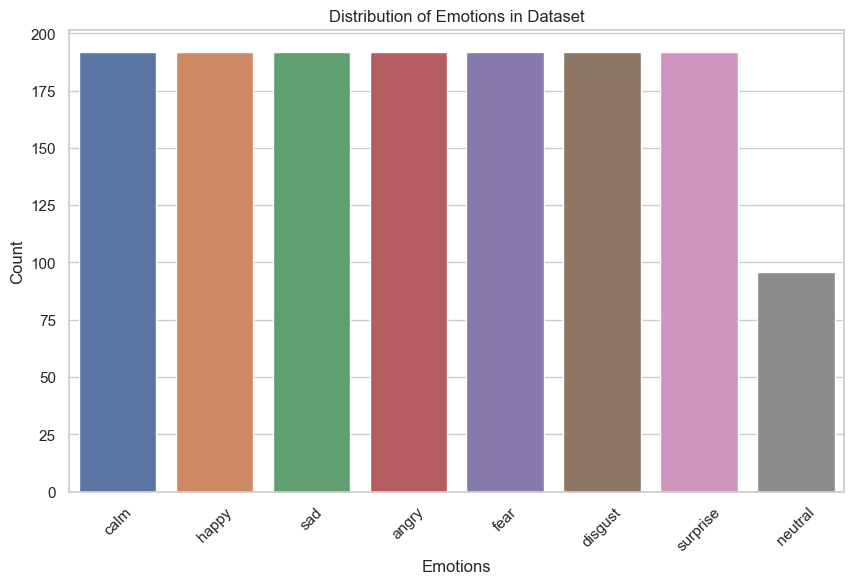

In [34]:

emotion_counts = Ravdess_df['Emotions'].value_counts()


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotions', data=Ravdess_df, order=emotion_counts.index)
plt.title('Distribution of Emotions in Dataset')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

In [97]:

def plot_waveform(signal, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    librosa.display.waveshow(signal, sr=sr)
    plt.show()
    
def plot_spectrogram(signal, sr, emotion):
   
    X = librosa.stft(signal)
    Xdb = librosa.amplitude_to_db(abs(X))
    

    freq_range = librosa.fft_frequencies(sr=sr)
    freq_limit = 10000
    freq_index_limit = np.argmax(freq_range >= freq_limit)
    
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    plt.ylim(0, freq_limit)
    

    librosa.display.specshow(Xdb[:freq_index_limit, :], sr=sr, x_axis='time', y_axis='hz')   

    
    plt.colorbar()
    
def plot_f0(signal, sr, emotion):

    hop_length = 256 
    f0, voiced_flag, voiced_probs = librosa.pyin(signal, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'), hop_length=hop_length, sr=sr)


    time_f0 = librosa.times_like(f0, hop_length=hop_length, sr=sr)

    # Plot the F0 on a secondary y-axis
    plt.figure(figsize=(12, 4))
    plt.plot(time_f0, f0, label='F0', color='red', linestyle='dashed')
    plt.title('F0 for audio with {} emotion'.format(emotion), size=15)
    plt.xlabel('Time (s)')
    plt.ylabel('F0 (Hz)')
    plt.legend()

    plt.show()

Sample rate is 48000


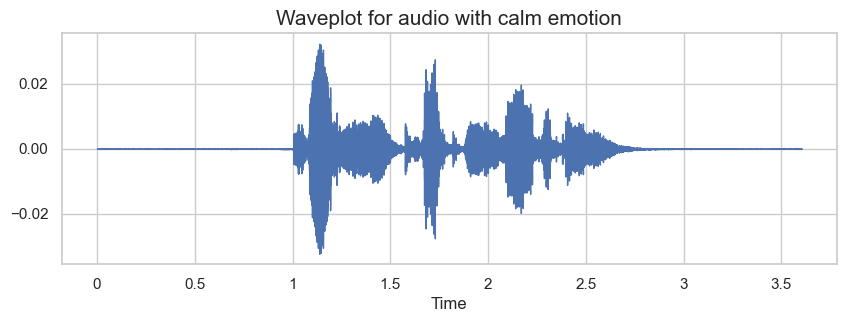

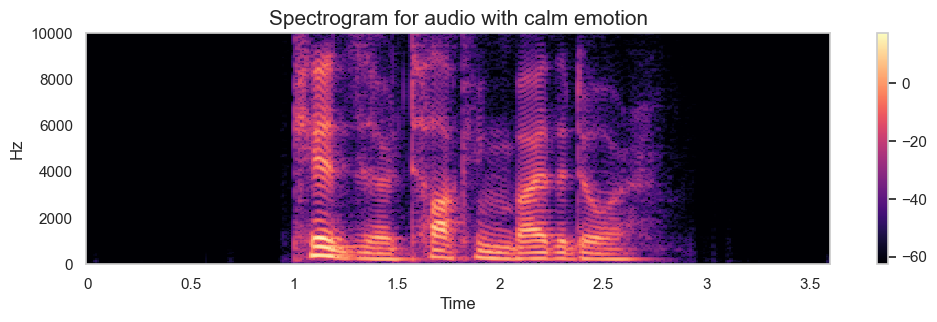

In [98]:
emotion='calm'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr, emotion)
Audio(path)

Sample rate is 48000


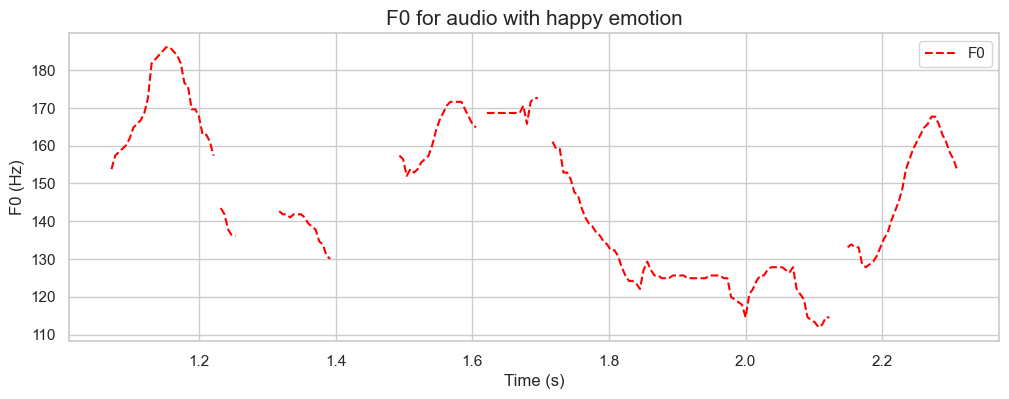

In [6]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


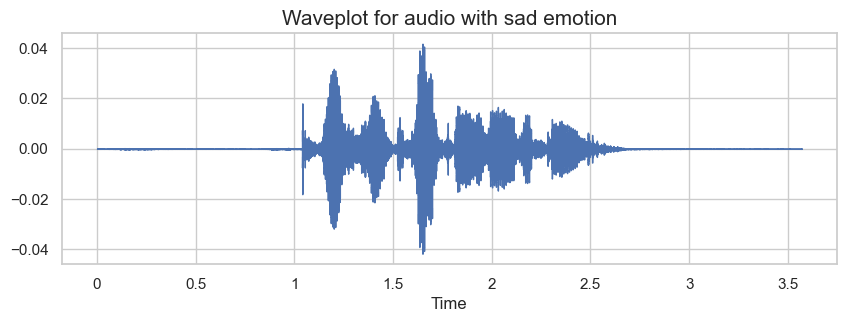

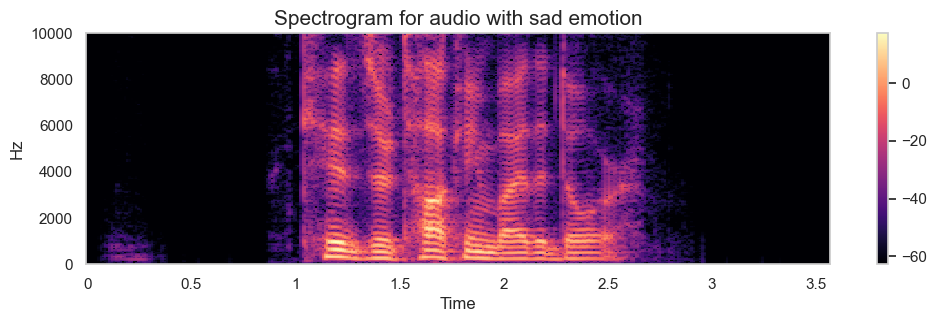

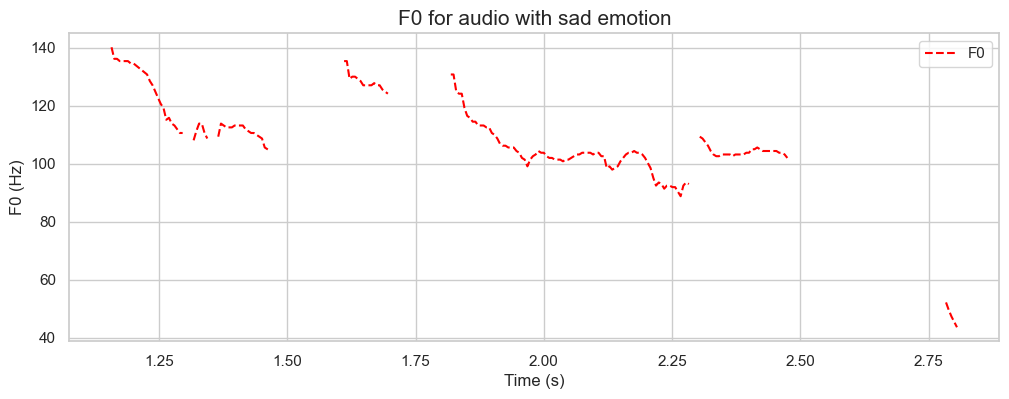

In [7]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


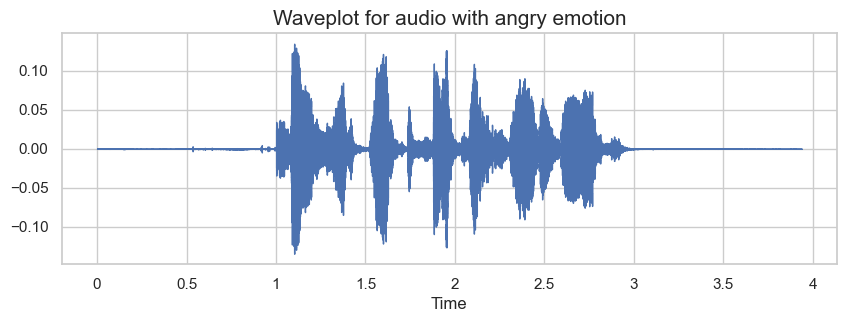

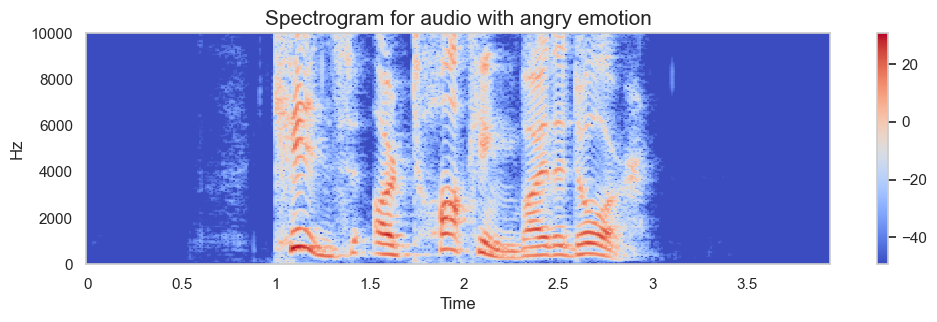

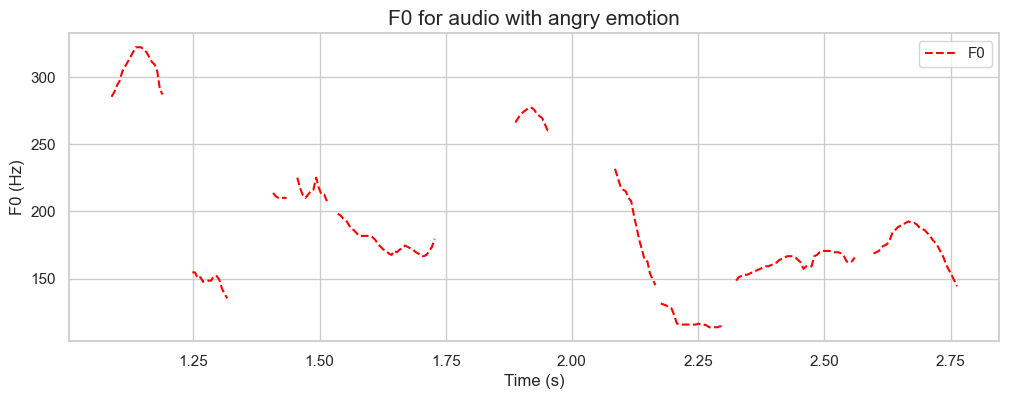

In [8]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


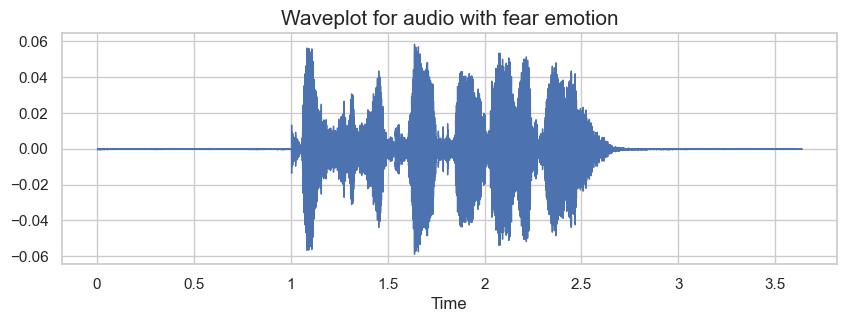

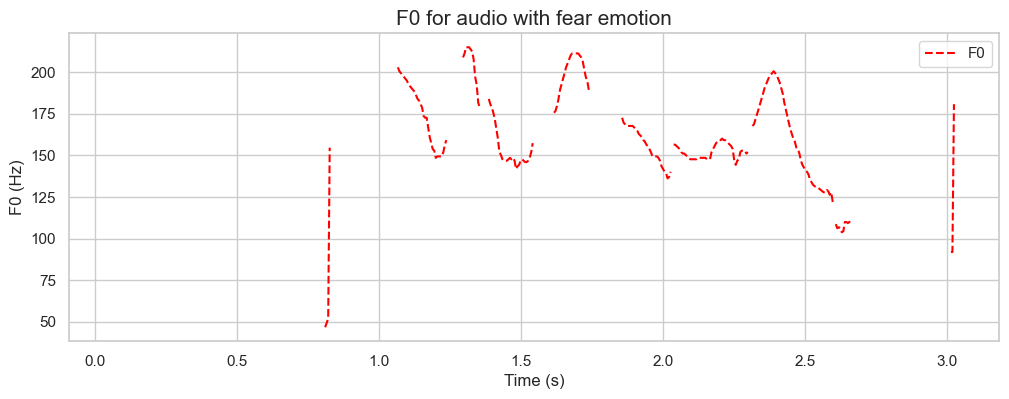

In [9]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


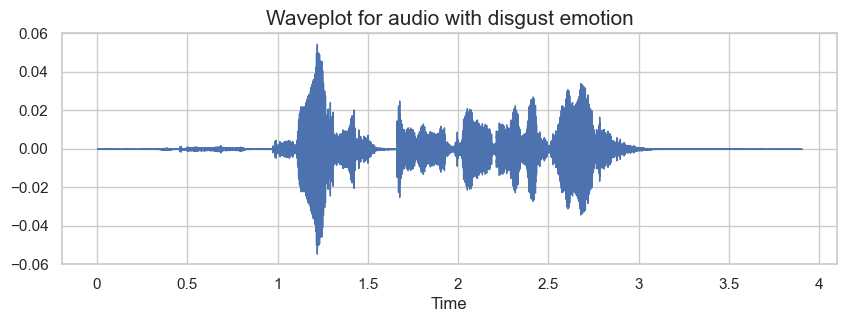

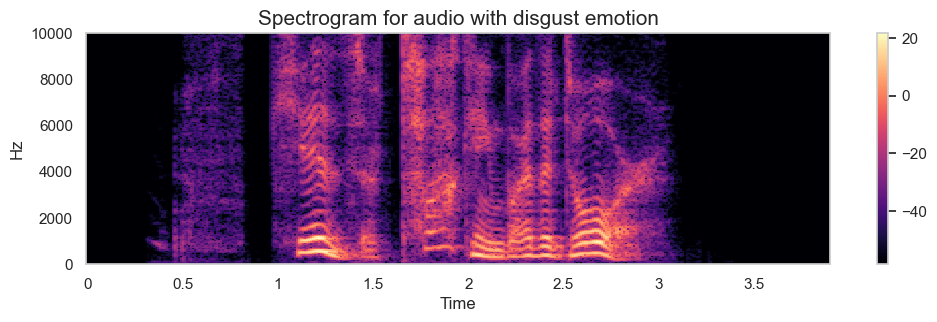

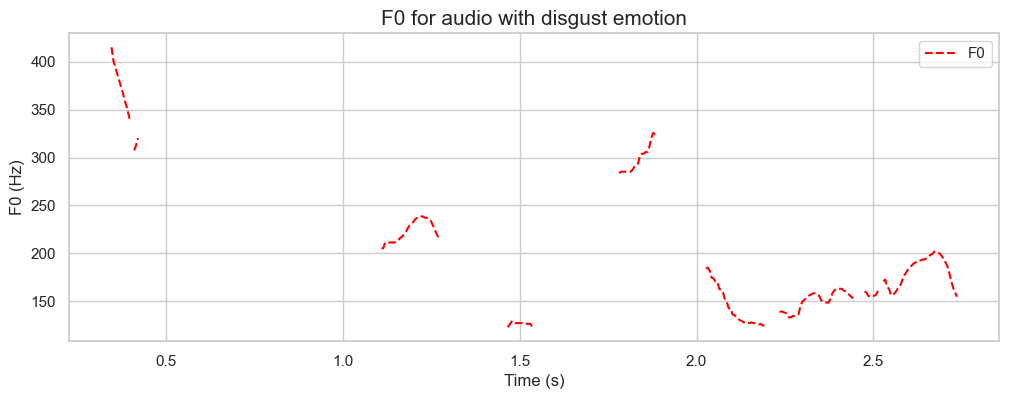

In [10]:
emotion='disgust'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


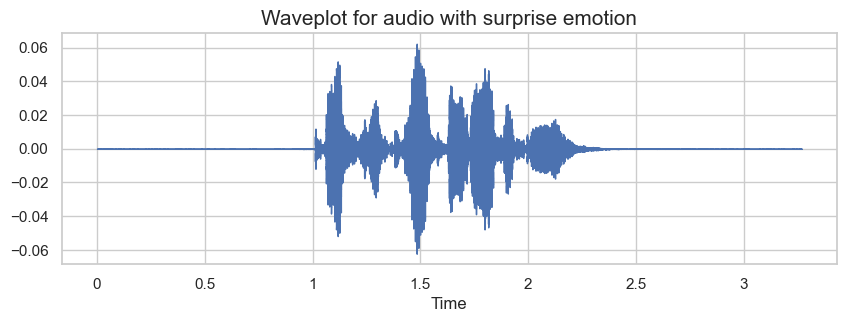

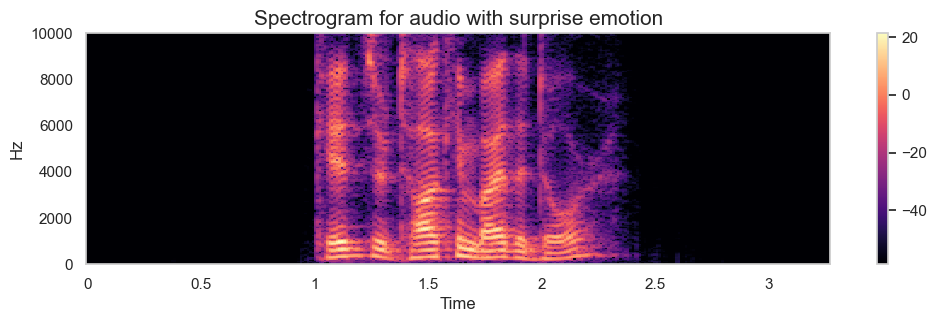

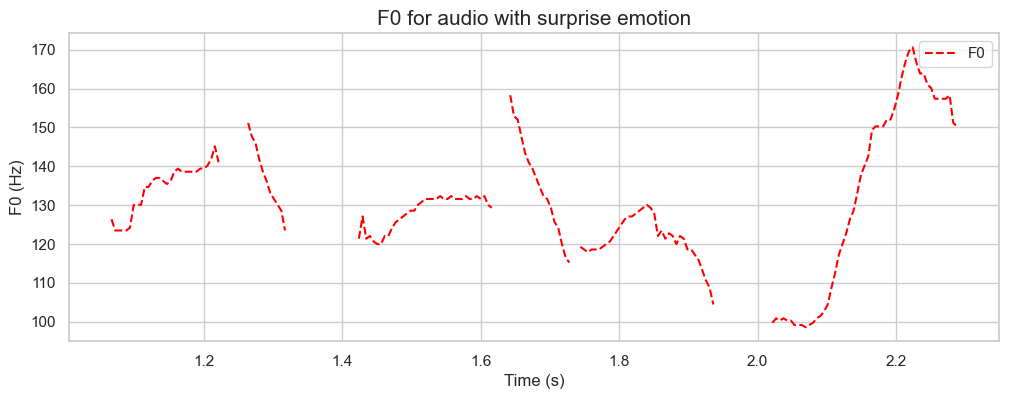

In [11]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


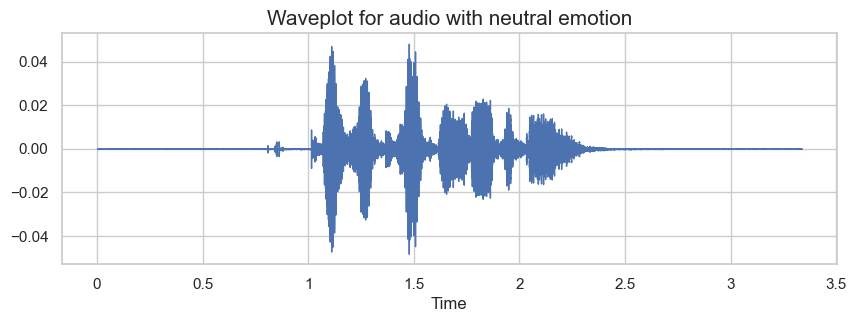

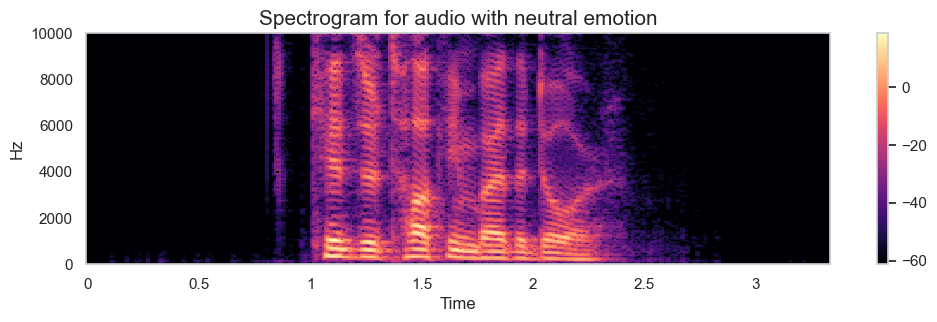

In [12]:
emotion='neutral'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

In [152]:

def feature_extraction(signal, sample_rate):
    # ZCR
    result = np.array([])
    # transpose data to calculate the mean from feature column not time frame column
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=signal).T, axis=0)
    result = np.hstack((result, zcr)) 
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    #STFT
    stft = np.abs(librosa.stft(signal))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=signal).T, axis=0)
    result = np.hstack((result, rms))  
    
    # F0 (fundamental frequency)
    f0, voiced_flag, voiced_probs = librosa.pyin(signal, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))
    f0_mean = np.mean(f0[voiced_flag]) if np.sum(voiced_flag) > 0 else 0.0
    result = np.hstack((result, f0_mean))  
    return result

In [153]:
def read_files(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    res1 = feature_extraction(data, sample_rate)
    result = np.array(res1)
    return result

In [166]:
data_features, data_labels = [], []


for dir, label in tqdm(zip(Ravdess_df.Path, Ravdess_df.Emotions), total=len(Ravdess_df)):
    features = read_files(dir)
    for feature in features:
        data_features.append(feature)
        data_labels.append(label)




100%|██████████| 1440/1440 [36:46<00:00,  1.53s/it]


In [167]:
len(data_features), len(data_labels), Ravdess_df.Path.shape

(50400, 50400, (1440,))

Transpose and seperate features and data for each instance

In [168]:
# Calculate the number of rows needed
num_rows = len(data_features) // 35


rows = []


for i in range(num_rows):
    start_index = i * 35
    end_index = start_index + 35
    row_data = data_features[start_index:end_index]
    row_data_dict = {f'feature{j+1}': value for j, value in enumerate(row_data)}
    row_data_dict['label'] = data_labels[i * 35]   # Use modulo to cycle through labels
    rows.append(row_data_dict)

# Create the DataFrame
df = pd.DataFrame(rows)

In [169]:
df

feature1    feature2   feature3   feature4   feature5   feature6  \
0     0.321275 -645.880737  72.619637   0.841305  16.399446  10.241591   
1     0.293566 -634.663269  72.324066  -2.998578  20.209740  10.674217   
2     0.337678 -643.285645  74.262268  -1.228256  16.242317   5.608830   
3     0.323342 -644.624451  69.160400   3.003006  16.580229   7.867353   
4     0.258536 -652.413757  87.086311   3.265245  20.345898  10.620335   
...        ...         ...        ...        ...        ...        ...   
1435  0.285767 -521.711426  32.909378 -24.168884  -2.592023 -20.516428   
1436  0.192546 -418.274689  58.652531 -24.129539  -9.900012 -24.381844   
1437  0.197424 -422.523956  46.944302 -28.878092  -5.081839 -22.852894   
1438  0.198342 -391.612854  33.800251  -8.937595   1.627515 -17.160513   
1439  0.219971 -448.716217  40.762936  -2.935251  -5.713507  -7.369172   

       feature7   feature8   feature9  feature10  ...  feature27  feature28  \
0      0.653901  -4.328002  -4.258932 -14.575824  ...   0.660531   0.684966   
1     -1.151011  -2.813592  -7.923956 -16.231958  ...   0.675352   0.628977   
2      0.250306  -4.034254  -8.218330 -14.603807  ...   0.651788   0.629598   
3      2.587296  -2.231727  -8.238157 -12.929442  ...   0.684238   0.673684   
4      1.831458  -5.369885  -6.077728 -14.500923  ...   0.656875   0.630116   
...         ...        ...        ...        ...  ...        ...        ...   
1435 -12.915703 -20.647842 -20.418070  -8.182895  ...   0.570641   0.622342   
1436 -22.296522 -17.128918 -19.334000 -13.341264  ...   0.463587   0.490272   
1437 -28.033836 -19.528757 -19.708939 -10.898678  ...   0.552281   0.543232   
1438  -8.291159 -15.292921 -13.379549  -2.552089  ...   0.640384   0.598422   
1439  -9.962165 -14.979671  -8.507465 -13.733122  ...   0.565728   0.585875   

      feature29  feature30  feature31  feature32  feature33  feature34  \
0      0.733049   0.753971   0.736093   0.717019   0.668645   0.002988   
1      0.679179   0.707283   0.734498   0.724930   0.702075   0.003226   
2      0.679255   0.737464   0.727339   0.643759   0.653551   0.003665   
3      0.699704   0.733066   0.692059   0.681603   0.705332   0.003319   
4      0.668770   0.673900   0.698793   0.728545   0.627890   0.002347   
...         ...        ...        ...        ...        ...        ...   
1435   0.627065   0.630980   0.634692   0.650627   0.677203   0.010368   
1436   0.521521   0.525022   0.520155   0.571802   0.663677   0.018468   
1437   0.491229   0.526739   0.537532   0.588741   0.630415   0.016084   
1438   0.534371   0.542707   0.564788   0.613538   0.629665   0.020191   
1439   0.636384   0.642514   0.665628   0.688886   0.692758   0.018255   

       feature35     label  
0     112.702110   neutral  
1     117.651090   neutral  
2     116.668926   neutral  
3     111.243145   neutral  
4     117.874667      calm  
...          ...       ...  
1435  353.588985  surprise  
1436  490.785258  surprise  
1437  432.943034  surprise  
1438  325.417339  surprise  
1439  352.795960  surprise  

[1440 rows x 36 columns]

In [170]:
df.shape

(1440, 36)

In [171]:
df.to_csv('Features_before_augmentation.csv')

In [173]:
df['label'].value_counts()

calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: label, dtype: int64